# **Machine Learning Model Goal:**
### The goal of our machine learning model is to predict the risk category of loans based on various loan-related features such as the amount, interest rate, installment, and employment length. This model aims to classify loans into different risk categories (e.g., high risk, moderate risk, low risk) to help financial institutions manage their portfolios more effectively and make informed lending decisions. Given the imbalanced nature of the dataset, we will use ensemble learning methods, such as Random Forest and XGBoost, along with Logistic Regression and Decision Trees, to achieve robust predictive performance. Feature engineering, label encoding, and outlier removal will be performed to prepare the data for training these models.

## **Machine Learning Model:-**

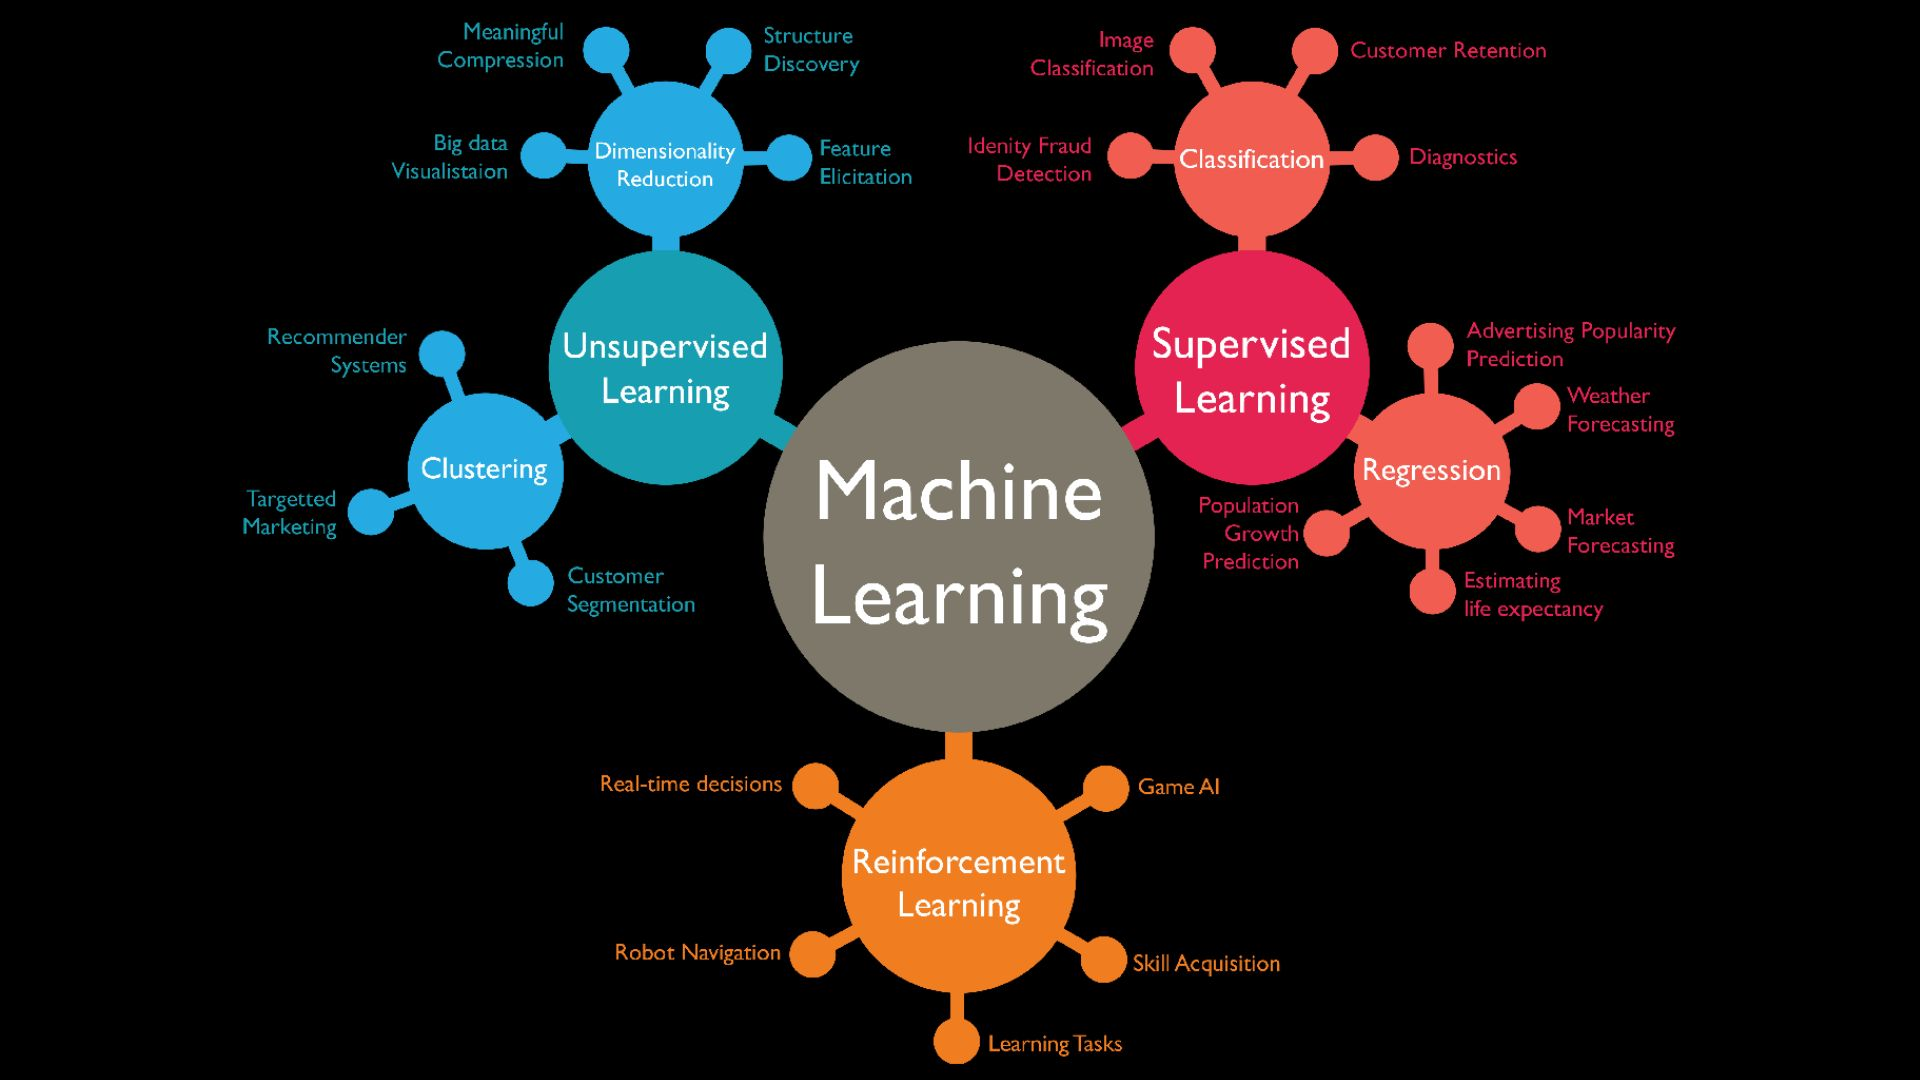

## Supervised learning

---


### It is the most common type of machine learning. It is used when you have labeled data, meaning that you know the desired output for each input.


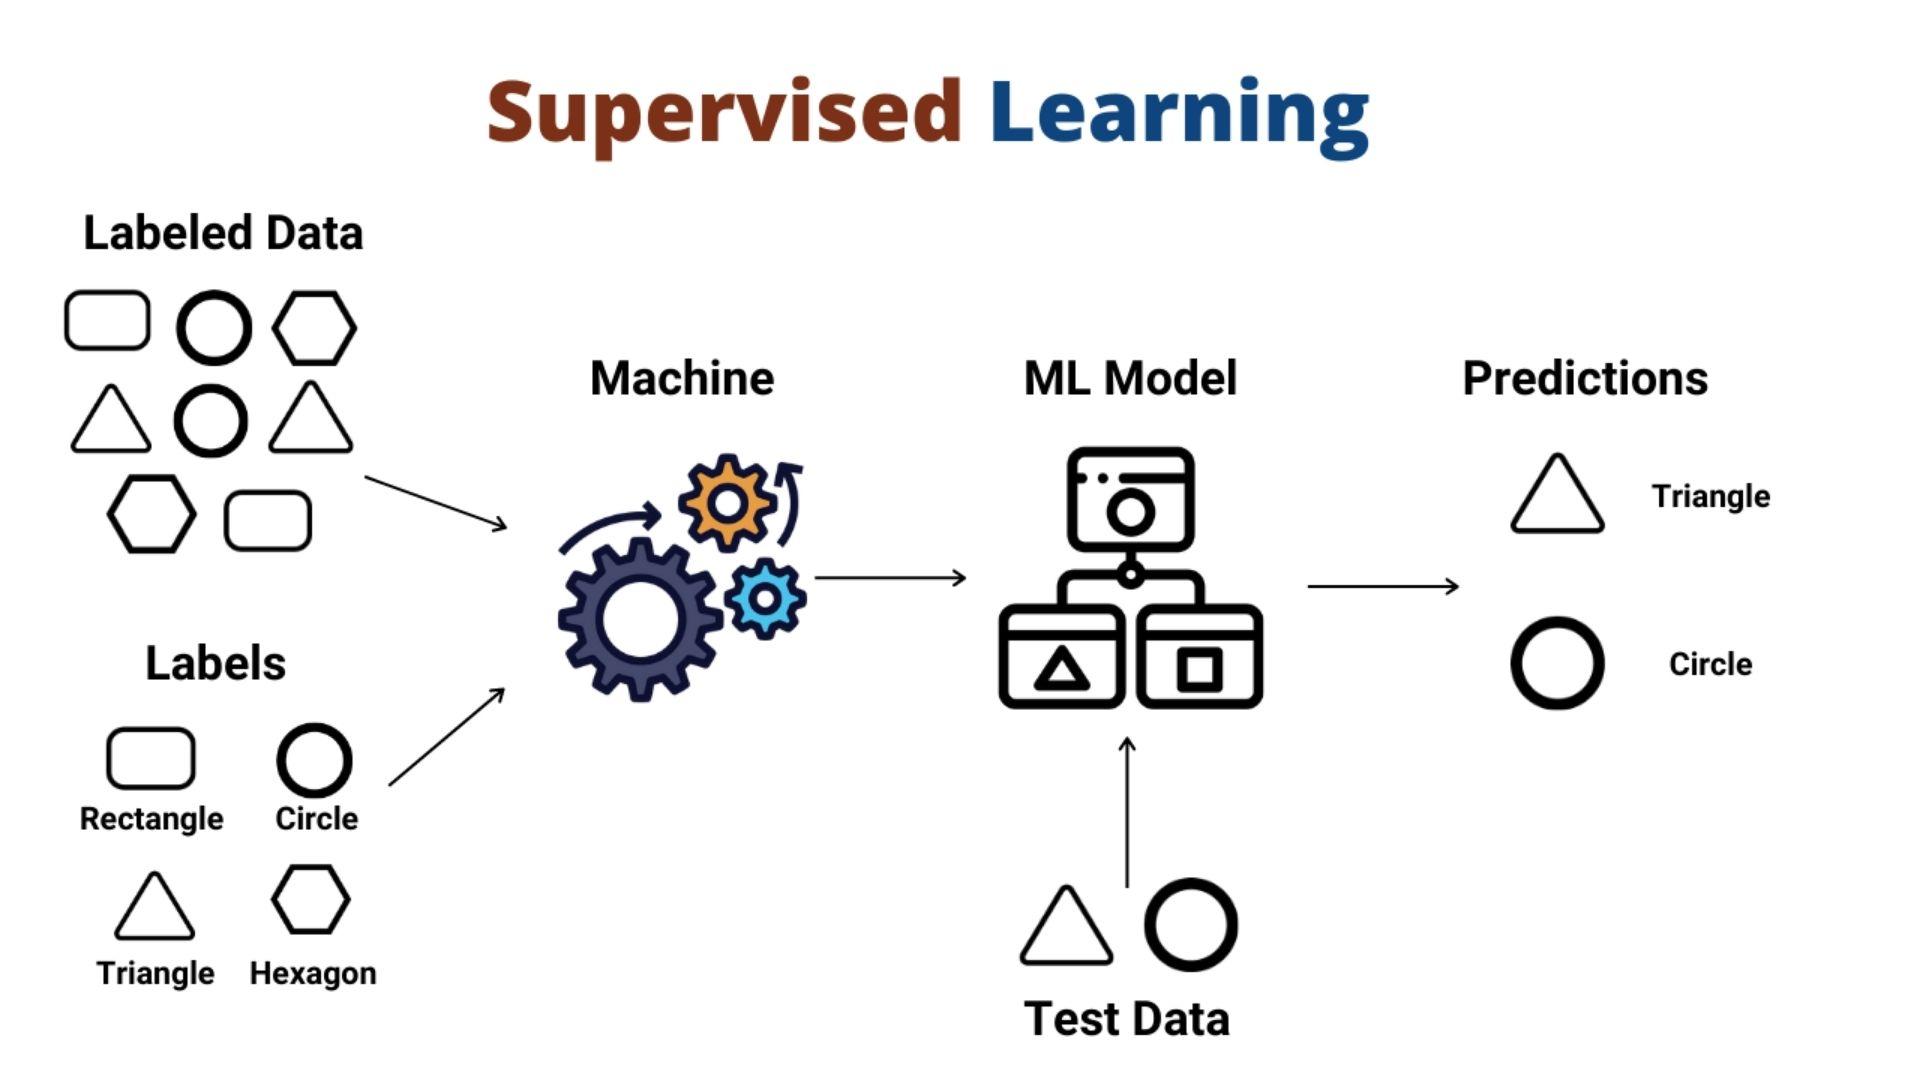

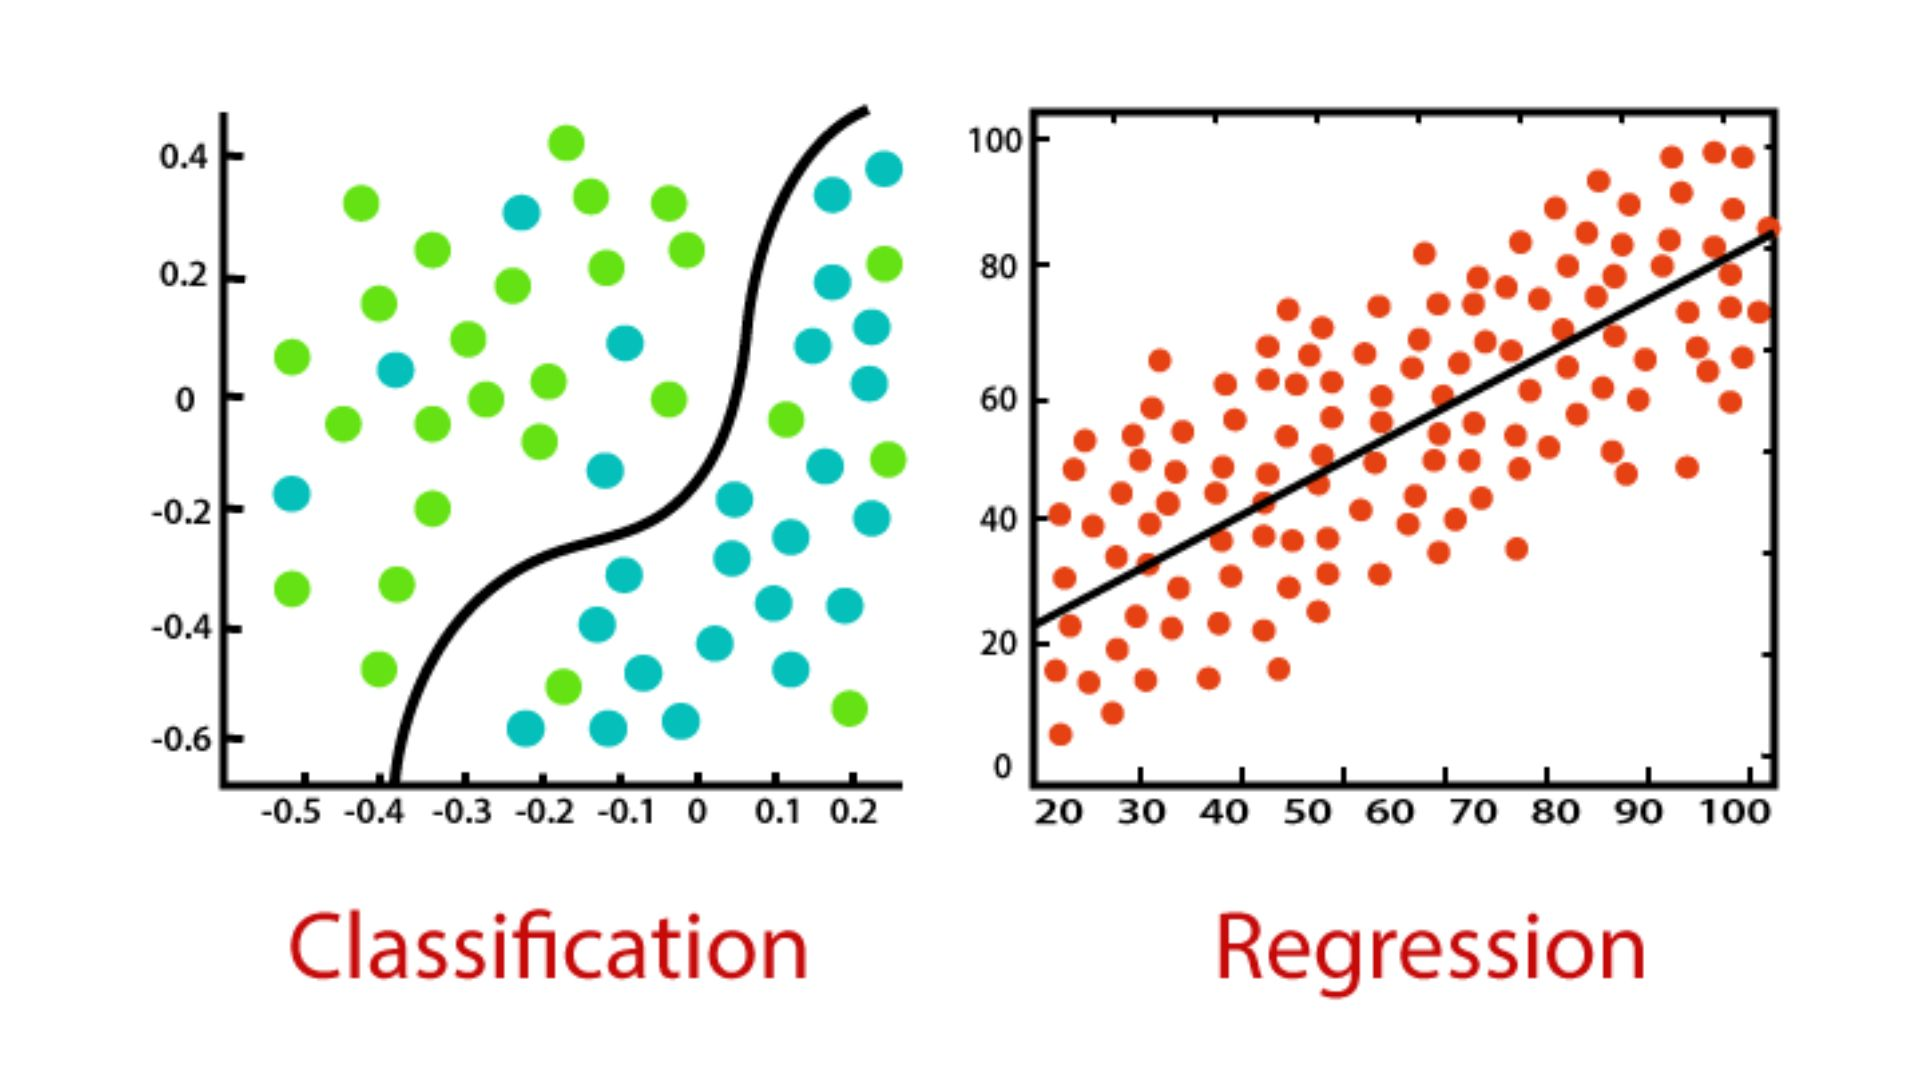

## Unsupervised learning

---


### It is used when you do not have labeled data. The model learns to find patterns in the data without being explicitly told what to look for.


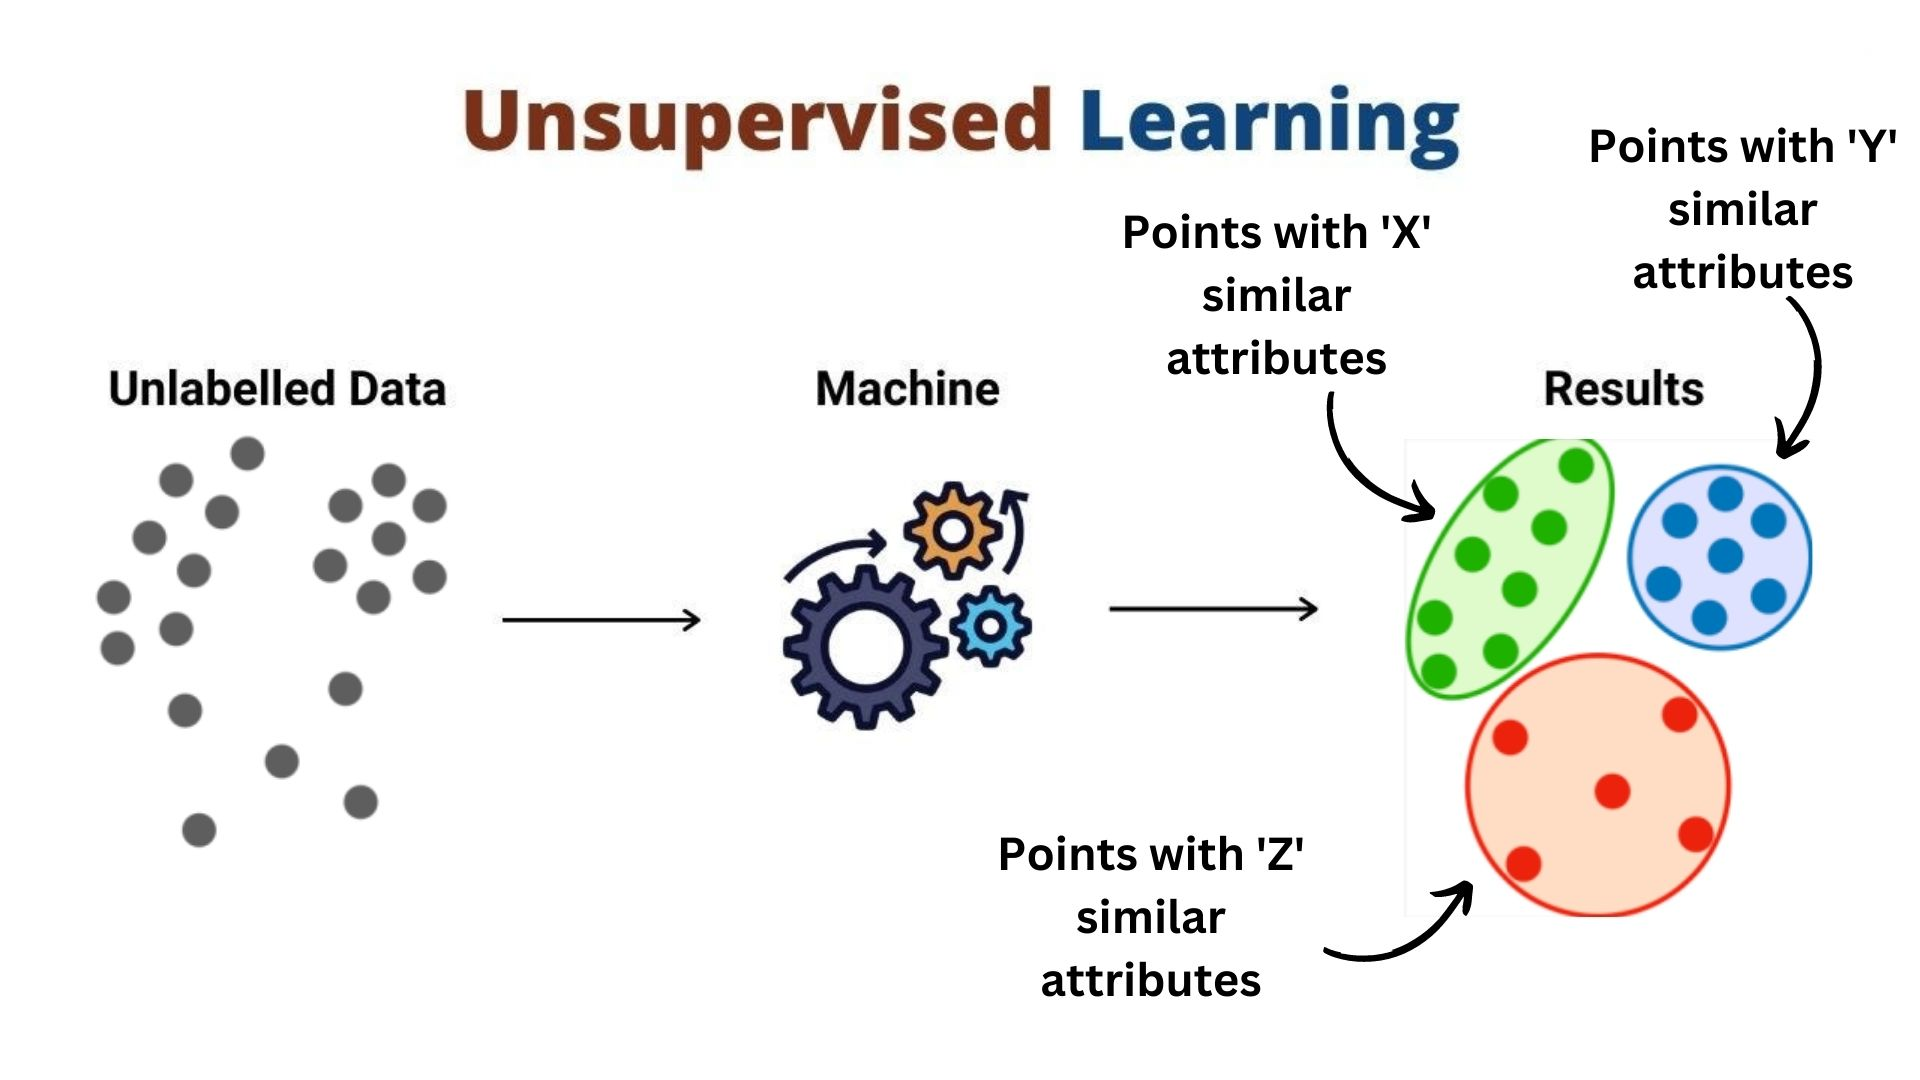

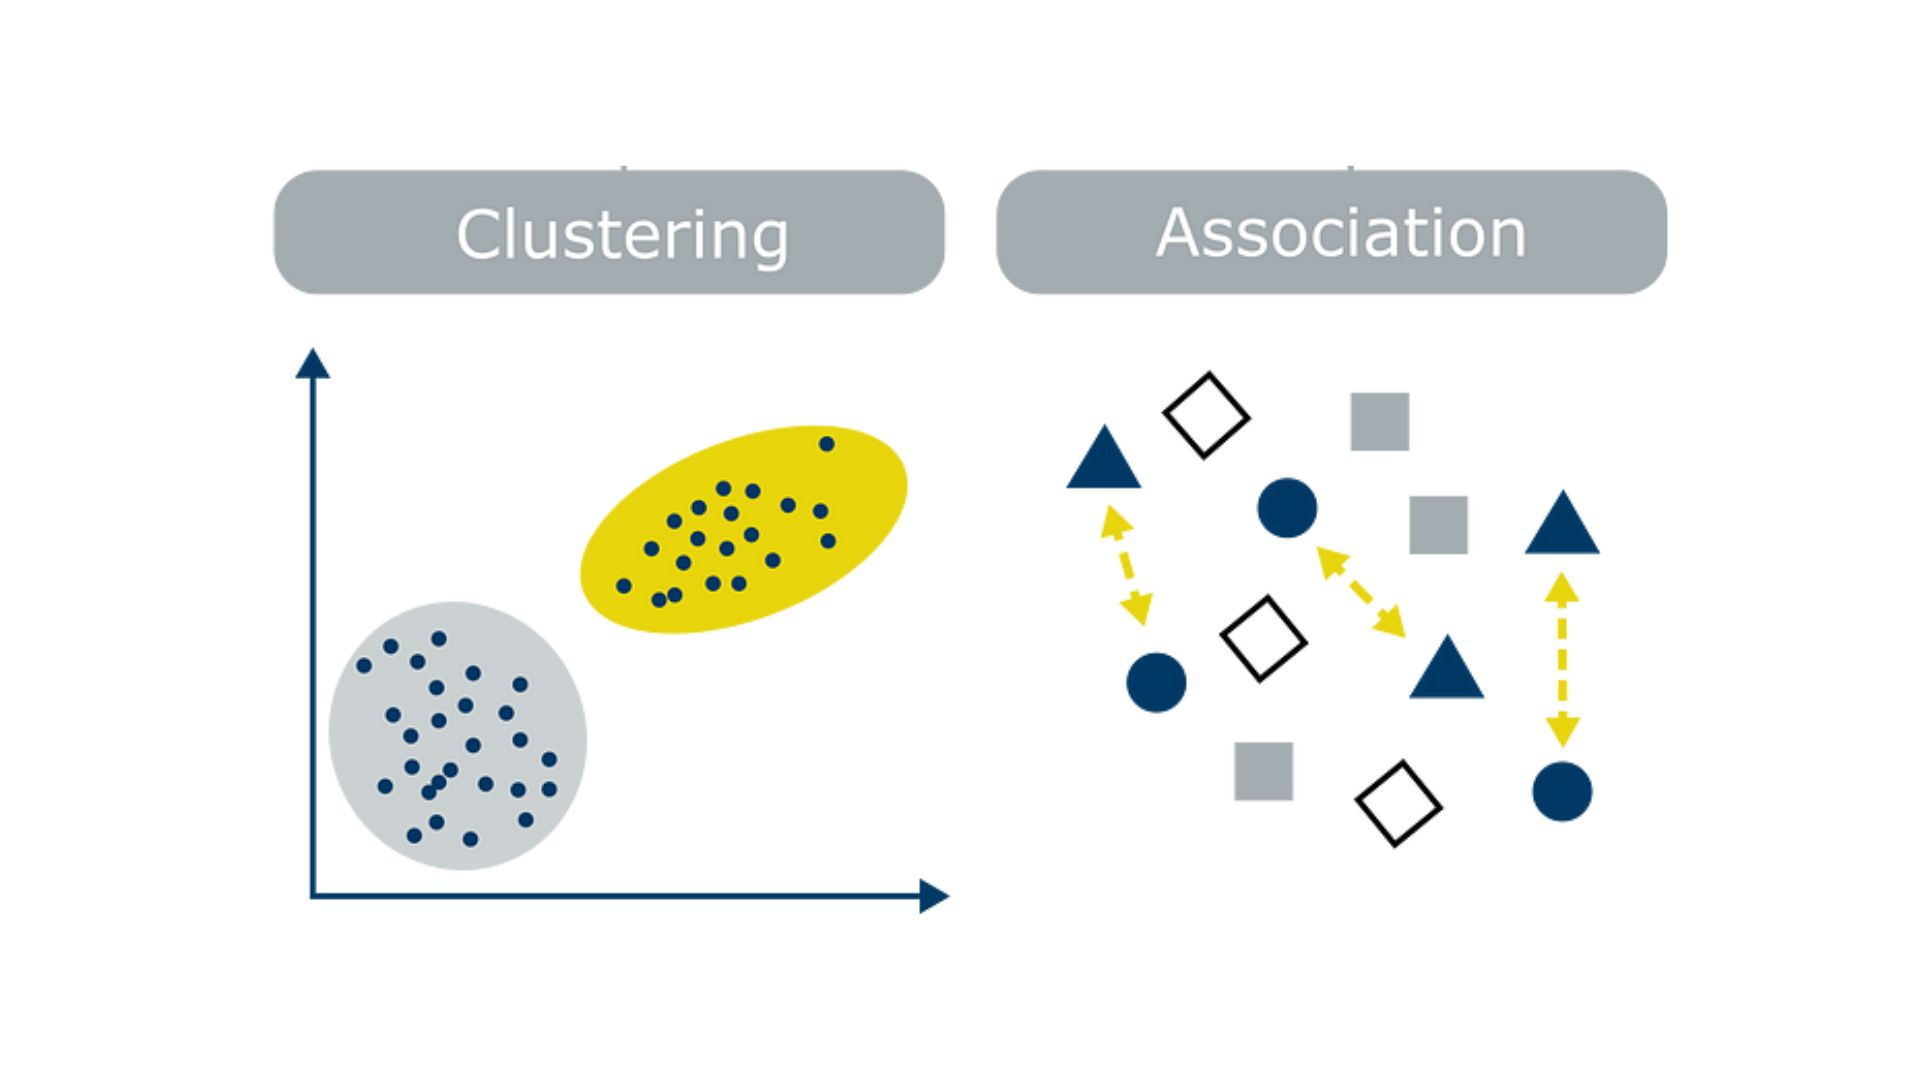

## Supervised Classification vs Unsupervised Clustering

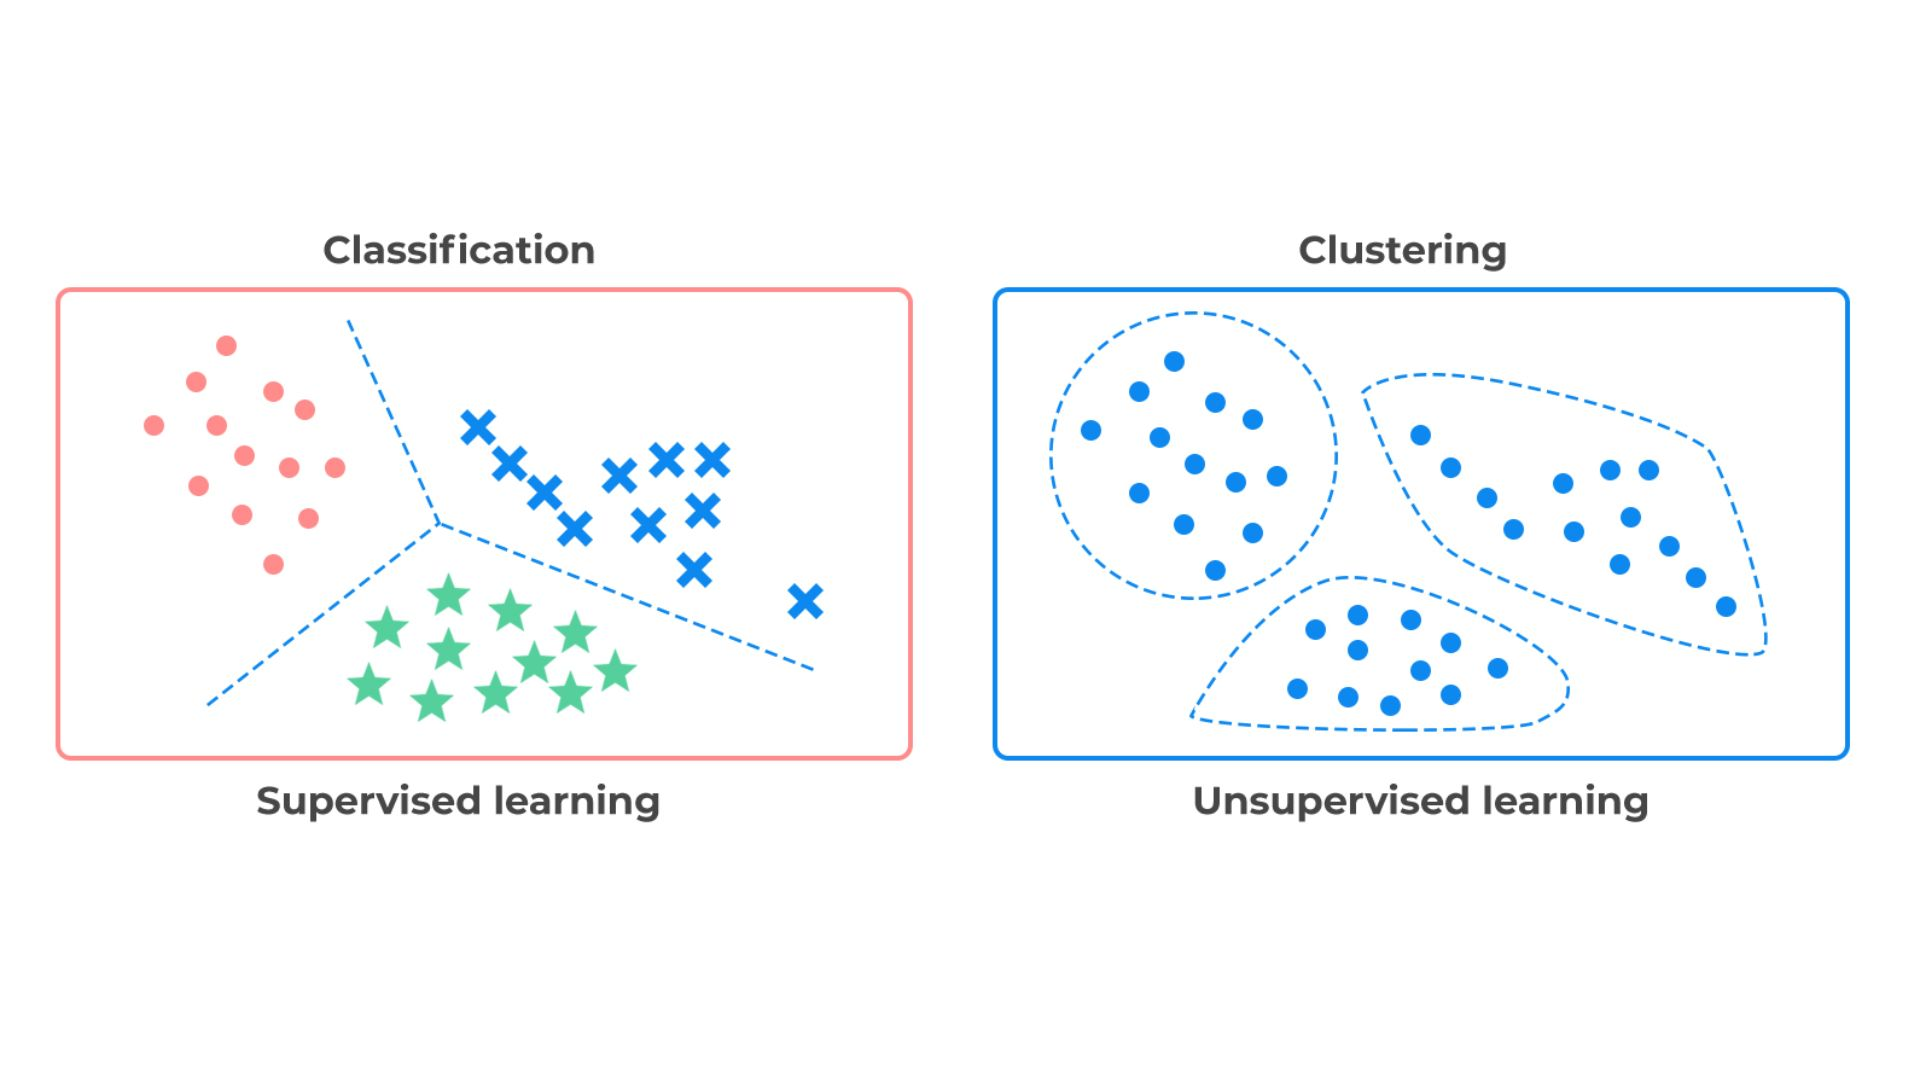






## Reinforcement learning

---


### It is a type of machine learning in which the agent learns by trial and error. The agent is given a reward for taking actions that lead to desired outcomes, and a penalty for taking actions that lead to undesired outcomes. The agent learns to take actions that maximize its rewards. For example.....


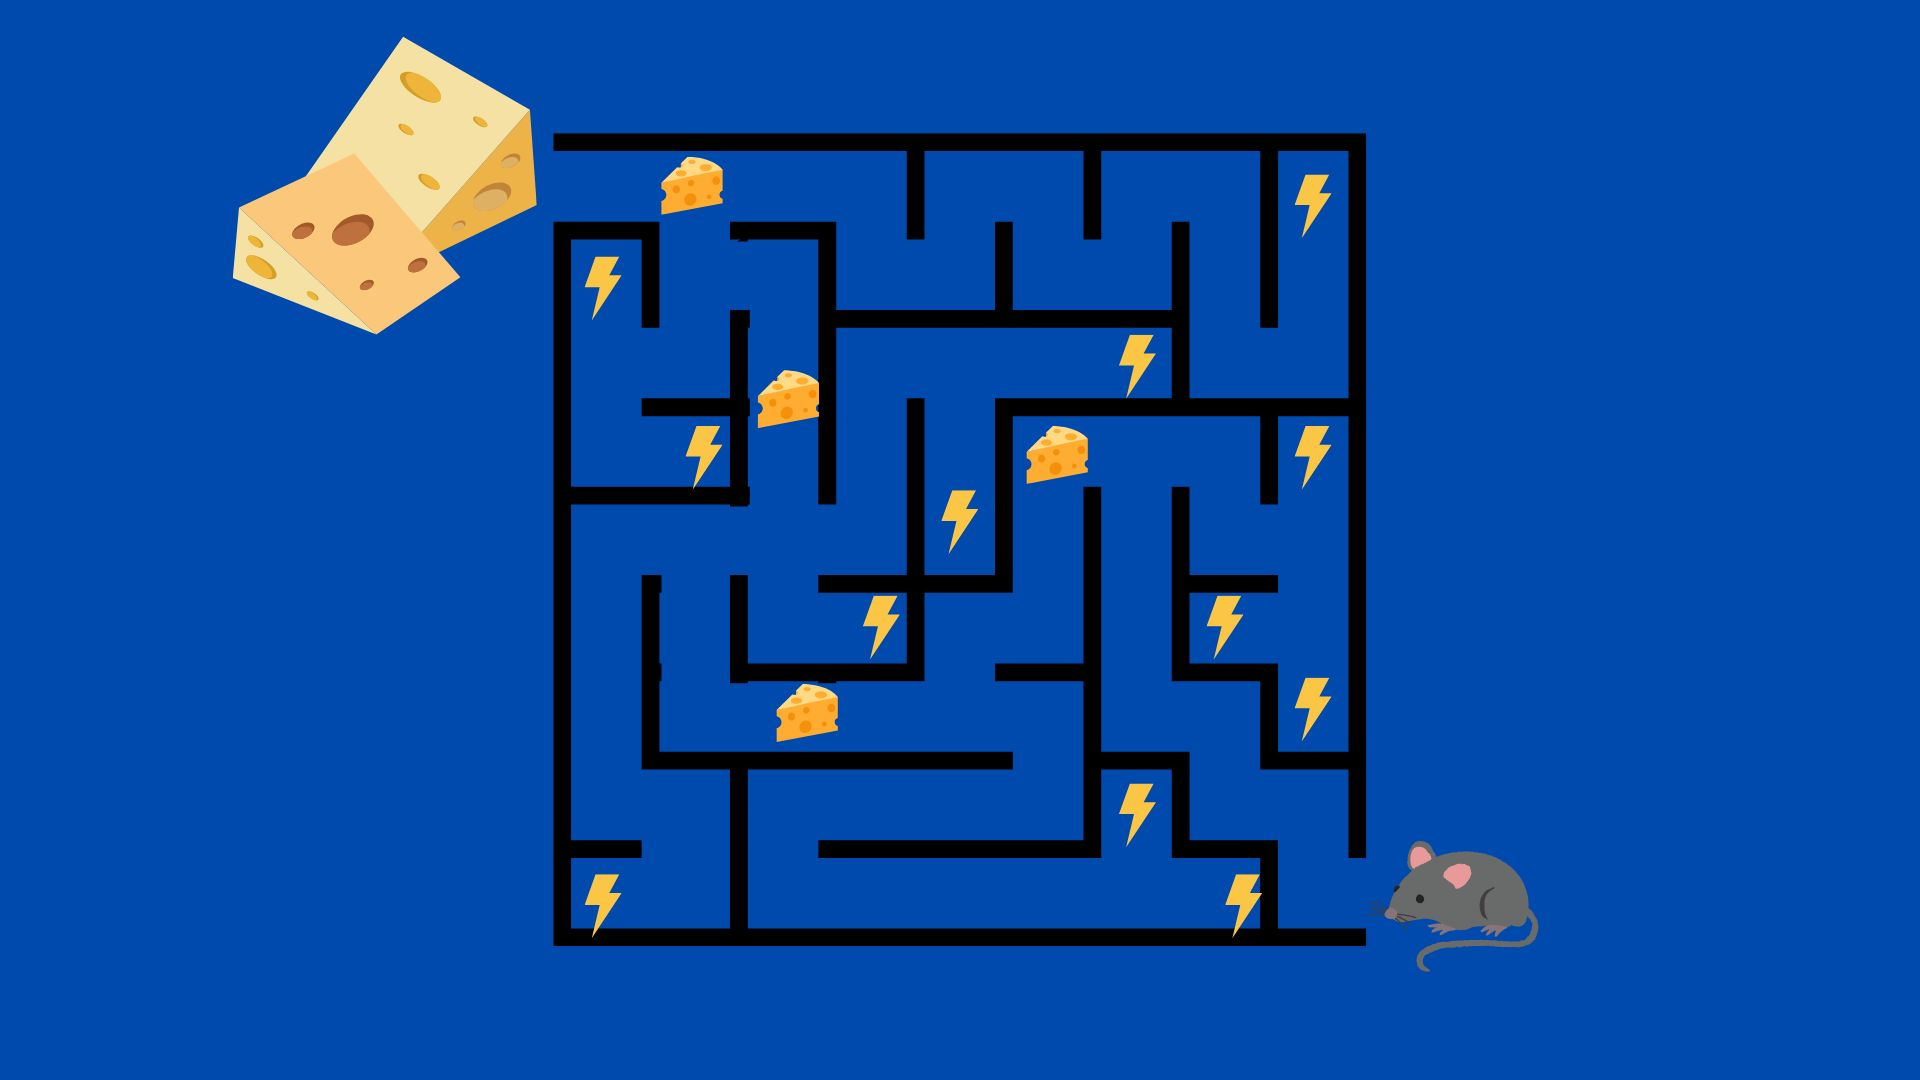

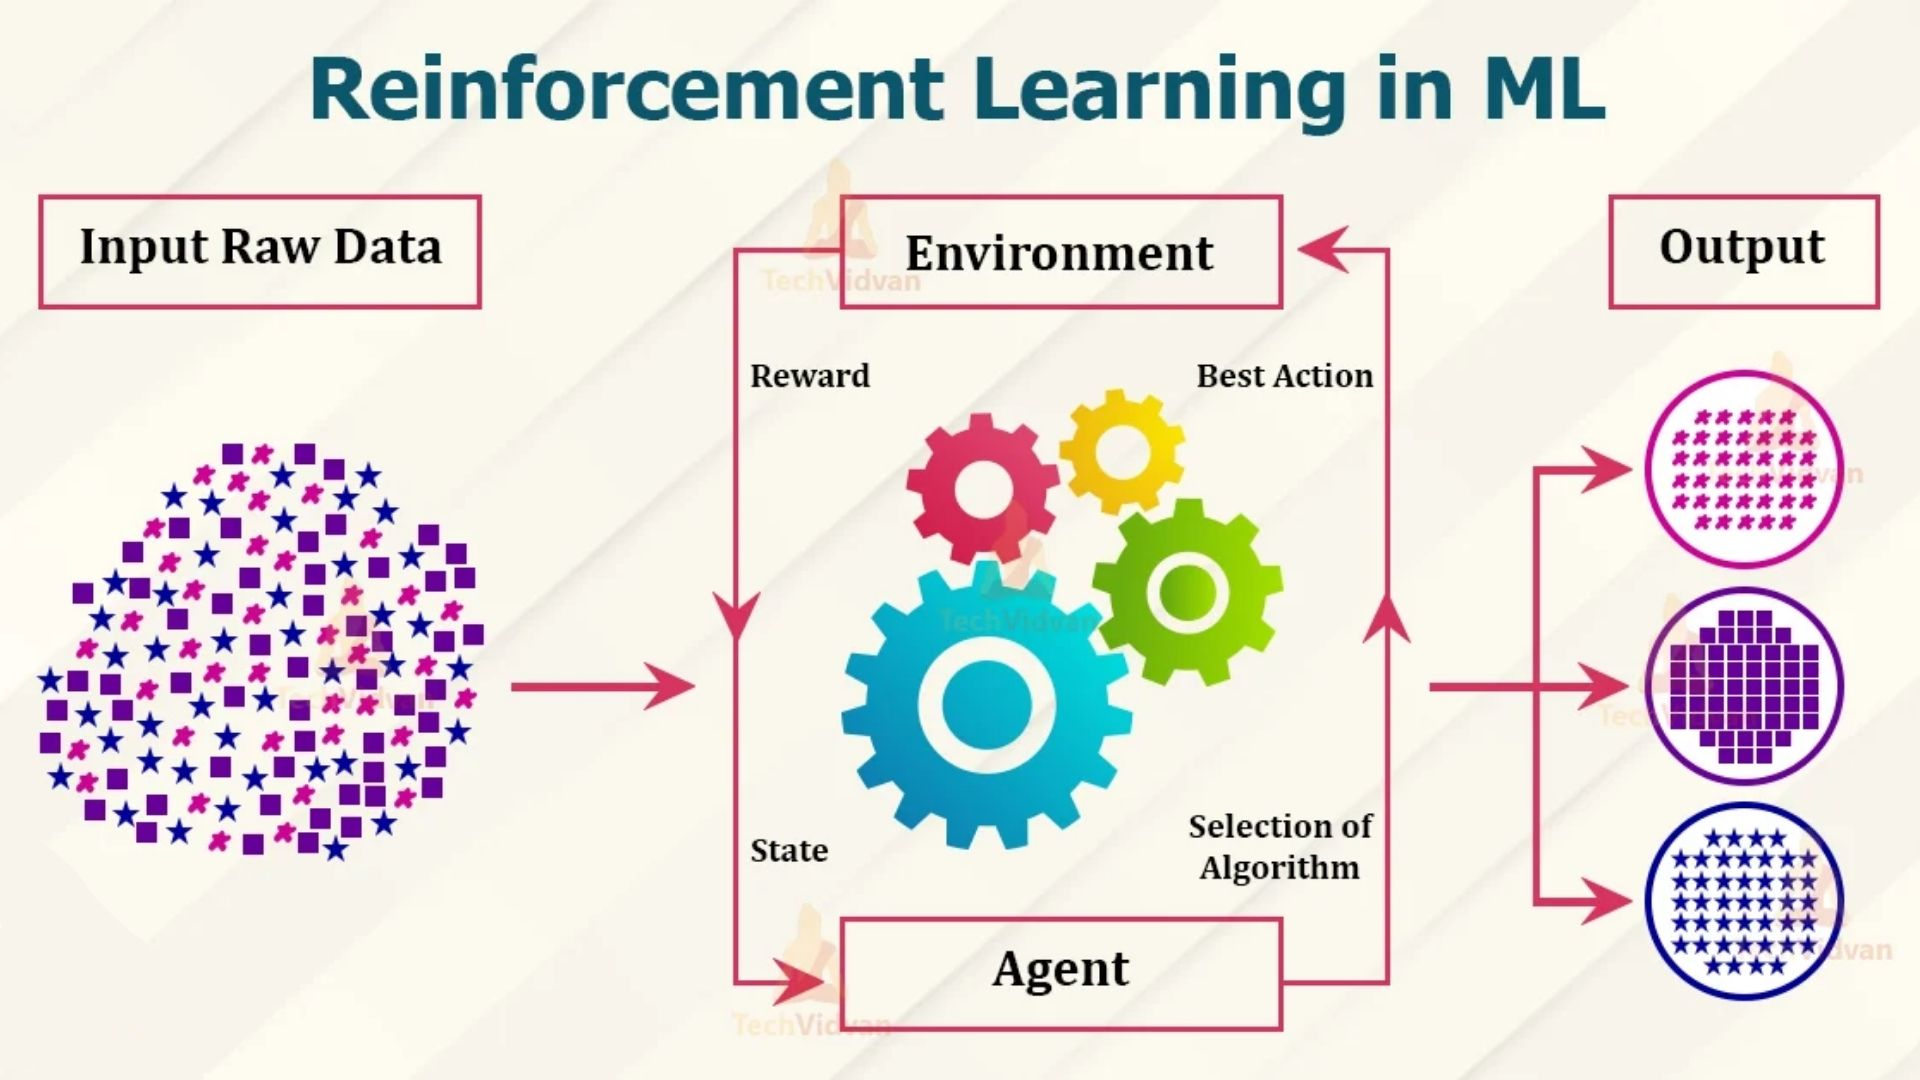

# Machine Learning Models Trained on the Entire Dataset

# **Imports**

Importing the pandas library for data manipulation and analysis
and the numpy library for numerical operations and array manipulations


In [ ]:
import pandas as pd
import numpy as np

Reading a CSV file into a DataFrame for further data analysis


In [ ]:
df = pd.read_csv("/content/new_preprocessed_loan_data.csv")
df.head()

,Unnamed: 0,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Annual_Income,Debt_to_Income_Ratio,Verification_Status,...,Public_Record,Total_Accounts,Total_Received_Principal,Total_Received_Interest,Purpose,Loan_Status,Issue_Month,Issue_Year,region,Risk_Category
0,0,5000.0,10.65,162.87,36,10.0,RENT,24000.0,27.65,Verified,...,0.0,9.0,5000.00,861.07,credit_card,Fully Paid,Dec,2011,SouthWest,Low Risk
1,1,2500.0,15.27,59.83,60,0.5,RENT,30000.0,1.00,Source Verified,...,0.0,4.0,456.46,435.17,car,Charged Off,Dec,2011,SouthEast,High Risk
2,2,2400.0,15.96,84.33,36,10.0,RENT,12252.0,8.72,Not Verified,...,0.0,10.0,2400.00,603.65,small_business,Fully Paid,Dec,2011,MidWest,Low Risk
3,3,10000.0,13.49,339.31,36,10.0,RENT,49200.0,20.00,Source Verified,...,0.0,37.0,10000.00,2209.33,other,Fully Paid,Dec,2011,West,Low Risk
4,4,5000.0,7.90,156.46,36,3.0,RENT,36000.0,11.20,Source Verified,...,0.0,12.0,5000.00,631.38,wedding,Fully Paid,Dec,2011,SouthWest,Low Risk


# **Feature Engineering**

Accessing the column labels of the DataFrame


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Home_Ownership'].value_counts()

,count
Home_Ownership,
MORTGAGE,125305
RENT,108288
OWN,21563
OTHER,168
NONE,42
ANY,1


In [ ]:
df['Verification_Status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
df['Verification_Status'] = df['Verification_Status'].replace('Source Verified', 'Verified')

In [ ]:
df = df[df['Home_Ownership'] != 'NONE']
df = df[df['Home_Ownership'] != 'ANY']

Dropping the 'Unnamed: 0' column from the DataFrame

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df['Terms(Months)'].value_counts()

,count
Terms(Months),
36,194645
60,60679


Defining a list of columns to be dropped and Dropping specified columns from the DataFrame

In [ ]:
columns_to_drop = ['Delinquency_2yrs', 'Total_Accounts','Sub_Grade',
       'Total_Received_Principal', 'Total_Received_Interest',
                   'Loan_Status', 'Issue_Month', 'Issue_Year', 'region',
                   'Public_Record', 'Annual_Income']
                   # 'Debt_to_Income_Ratio','Installment''Open_Accounts',
df = df.drop(columns=columns_to_drop)

In [ ]:
df.columns

Index(['Loan_Amount', 'Interest_Rate', 'Installment', 'Terms(Months)',
       'Employment_Length', 'Home_Ownership', 'Debt_to_Income_Ratio',
       'Verification_Status', 'Grade', 'Open_Accounts', 'Purpose',
       'Risk_Category'],
      dtype='object')

Creating a new column `'Total_Received_Amount'` by summing `'Total_Received_Principal'` and `'Total_Received_Interest'` and dropping others

Displaying the first five rows of the updated DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255324 entries, 0 to 266027
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Loan_Amount           255324 non-null  float64
 1   Interest_Rate         255324 non-null  float64
 2   Installment           255324 non-null  float64
 3   Terms(Months)         255324 non-null  int64  
 4   Employment_Length     255324 non-null  float64
 5   Home_Ownership        255324 non-null  object 
 6   Debt_to_Income_Ratio  255324 non-null  float64
 7   Verification_Status   255324 non-null  object 
 8   Grade                 255324 non-null  object 
 9   Open_Accounts         255324 non-null  float64
 10  Purpose               255324 non-null  object 
 11  Risk_Category         255324 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 25.3+ MB


In [ ]:
df['Purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

# **Label Encoding**

Convert categorical variables into numerical values using Label Encoding and One-Hot Encoding.

Importing LabelEncoder and OneHotEncoder for encoding categorical variables. Initializing a dictionary to store LabelEncoders and defining ordinal columns to be label encoded.Looping through ordinal columns, fitting and transforming them with LabelEncoder, and storing the encoders. Defining nominal columns to be one-hot encoded and applying one-hot encoding.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

nominal_columns = ['Purpose']
df = pd.get_dummies(df, columns=nominal_columns)

In [ ]:
df.head()

,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Debt_to_Income_Ratio,Verification_Status,Grade,Open_Accounts,...,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,5000.0,10.65,162.87,36,10.0,RENT,27.65,Verified,B,3.0,...,False,False,False,False,False,False,False,False,False,False
1,2500.0,15.27,59.83,60,0.5,RENT,1.00,Verified,C,3.0,...,False,False,False,False,False,False,False,False,False,False
2,2400.0,15.96,84.33,36,10.0,RENT,8.72,Not Verified,C,2.0,...,False,False,False,False,False,False,False,True,False,False
3,10000.0,13.49,339.31,36,10.0,RENT,20.00,Verified,C,10.0,...,False,False,False,False,False,True,False,False,False,False
4,5000.0,7.90,156.46,36,3.0,RENT,11.20,Verified,A,9.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
le_verification_status = LabelEncoder()
df['Verification_Status'] = le_verification_status.fit_transform(df['Verification_Status'])

In [ ]:
le_grade = LabelEncoder()
df['Grade'] = le_grade.fit_transform(df['Grade'])

le_home_ownership=LabelEncoder()
df['Home_Ownership'] = le_home_ownership.fit_transform(df['Home_Ownership'])


In [ ]:
verification_status_mapping = dict(zip(le_verification_status.classes_, le_verification_status.transform(le_verification_status.classes_)))
grade_mapping = dict(zip(le_grade.classes_, le_grade.transform(le_grade.classes_)))
home_ownership_mapping = dict(zip(le_home_ownership.classes_, le_home_ownership.transform(le_home_ownership.classes_)))

print("Verification Status Mapping:", verification_status_mapping)
print("Grade Mapping:", grade_mapping)
print("Home Ownership Mapping:", home_ownership_mapping)

Verification Status Mapping: {'Not Verified': 0, 'Verified': 1}
Grade Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Home Ownership Mapping: {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255324 entries, 0 to 266027
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Loan_Amount                 255324 non-null  float64
 1   Interest_Rate               255324 non-null  float64
 2   Installment                 255324 non-null  float64
 3   Terms(Months)               255324 non-null  int64  
 4   Employment_Length           255324 non-null  float64
 5   Home_Ownership              255324 non-null  int64  
 6   Debt_to_Income_Ratio        255324 non-null  float64
 7   Verification_Status         255324 non-null  int64  
 8   Grade                       255324 non-null  int64  
 9   Open_Accounts               255324 non-null  float64
 10  Risk_Category               255324 non-null  object 
 11  Purpose_car                 255324 non-null  bool   
 12  Purpose_credit_card         255324 non-null  bool   
 13  Purpose_debt_consol

In [ ]:
df.head()

,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Debt_to_Income_Ratio,Verification_Status,Grade,Open_Accounts,...,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,5000.0,10.65,162.87,36,10.0,3,27.65,1,1,3.0,...,False,False,False,False,False,False,False,False,False,False
1,2500.0,15.27,59.83,60,0.5,3,1.00,1,2,3.0,...,False,False,False,False,False,False,False,False,False,False
2,2400.0,15.96,84.33,36,10.0,3,8.72,0,2,2.0,...,False,False,False,False,False,False,False,True,False,False
3,10000.0,13.49,339.31,36,10.0,3,20.00,1,2,10.0,...,False,False,False,False,False,True,False,False,False,False
4,5000.0,7.90,156.46,36,3.0,3,11.20,1,0,9.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_new=df.copy()

Counting the occurrences of each unique value in the 'Risk_Category' column

In [ ]:
df_new['Risk_Category'].value_counts()

,count
Risk_Category,
Low Risk,192309
High Risk,53242
Moderate Risk,9773


Creating a dictionary to map 'Risk_Category' values to numerical representations. 'High Risk' is mapped to 2, 'Moderate Risk' to 1, and 'Low Risk' to 0.Applying the mapping to the 'Risk_Category' column in the DataFrame to convert categorical risk levels to numerical values.


Counting and displaying the occurrences of each unique numerical value in the 'Risk_Category' column

In [ ]:
df_new['Risk_Category'].value_counts()

,count
Risk_Category,
Low Risk,192309
High Risk,53242
Moderate Risk,9773


Listing the names of all columns in the updated DataFrame

In [ ]:
df_new.columns

Index(['Loan_Amount', 'Interest_Rate', 'Installment', 'Terms(Months)',
       'Employment_Length', 'Home_Ownership', 'Debt_to_Income_Ratio',
       'Verification_Status', 'Grade', 'Open_Accounts', 'Risk_Category',
       'Purpose_car', 'Purpose_credit_card', 'Purpose_debt_consolidation',
       'Purpose_educational', 'Purpose_home_improvement', 'Purpose_house',
       'Purpose_major_purchase', 'Purpose_medical', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [ ]:
risk_mapping = {
                'High Risk': 2,
                'Moderate Risk': 1,
                'Low Risk': 0
                }
df_new['Risk_Category'] = df_new['Risk_Category'].map(risk_mapping)


# **Outlier Removal**

Defining a function to remove outliers from specified columns using the IQR method by filtering values within the calculated bounds. Applying this function to columns of interest to clean the DataFrame.

<Axes: ylabel='Interest_Rate'>

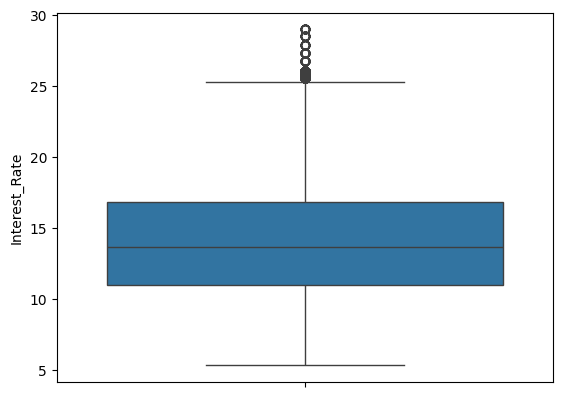

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df_new['Interest_Rate'])

In [ ]:
def remove_outliers_iqr(df_new, columns):

    for column in columns:
        Q1 = df_new[column].quantile(0.25)
        Q3 = df_new[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_new = df_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]
    return df_new

columns_to_check = ['Loan_Amount', 'Interest_Rate','Employment_Length']
df_new = remove_outliers_iqr(df_new, columns_to_check)


<Axes: ylabel='Interest_Rate'>

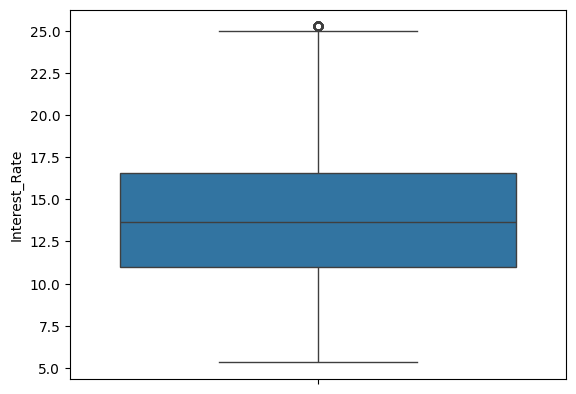

In [ ]:
sns.boxplot(df_new['Interest_Rate'],whis=1.5)

In [ ]:
df_new['Terms(Months)'].value_counts()

,count
Terms(Months),
36,194428
60,58775


Removing all rows with missing values from the DataFrame and updating it in place

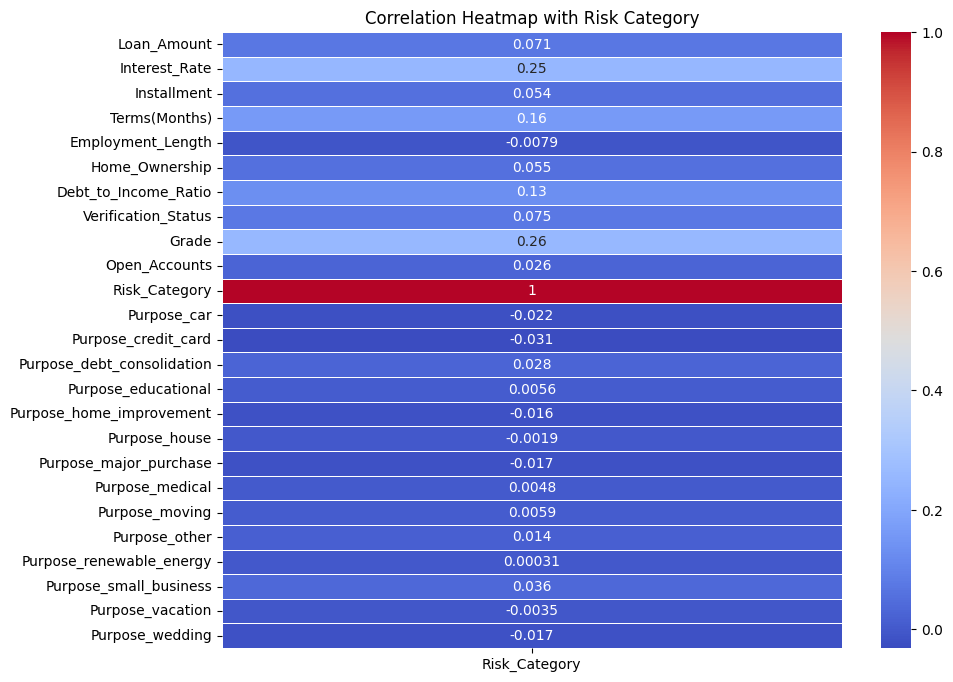

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame with the 'Risk_Category' and other relevant columns

# Compute the correlation matrix
correlation_matrix = df_new.corr()

# Extract the correlation of each feature with the 'Risk_Category'
risk_category_corr = correlation_matrix[['Risk_Category']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(risk_category_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Risk Category')
plt.show()


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253203 entries, 0 to 266027
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Loan_Amount                 253203 non-null  float64
 1   Interest_Rate               253203 non-null  float64
 2   Installment                 253203 non-null  float64
 3   Terms(Months)               253203 non-null  int64  
 4   Employment_Length           253203 non-null  float64
 5   Home_Ownership              253203 non-null  int64  
 6   Debt_to_Income_Ratio        253203 non-null  float64
 7   Verification_Status         253203 non-null  int64  
 8   Grade                       253203 non-null  int64  
 9   Open_Accounts               253203 non-null  float64
 10  Risk_Category               253203 non-null  int64  
 11  Purpose_car                 253203 non-null  bool   
 12  Purpose_credit_card         253203 non-null  bool   
 13  Purpose_debt_consol

In [ ]:
feature_columns = df_new.columns[(df_new.columns != 'Risk_Category') & (df_new.columns != 'Open_Accounts')]

target_column = 'Risk_Category'

In [ ]:
X = df_new[feature_columns]
y = df_new[target_column]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(253203, 23)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classifcation Report:')
print(report)

Accuracy: 0.7439212227327181
Classifcation Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     57477
           1       0.37      0.03      0.06      2860
           2       0.37      0.12      0.18     15624

    accuracy                           0.74     75961
   macro avg       0.51      0.37      0.36     75961
weighted avg       0.67      0.74      0.68     75961



In [ ]:
y_pred_proba = clf.predict_proba(X_test)

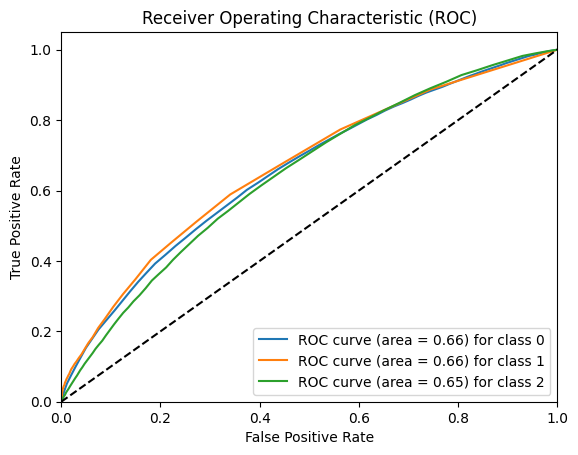

In [ ]:
from sklearn.metrics import roc_curve,auc

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %i' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[54554    85  2838]
 [ 2478    96   286]
 [13687    78  1859]]


<Axes: >

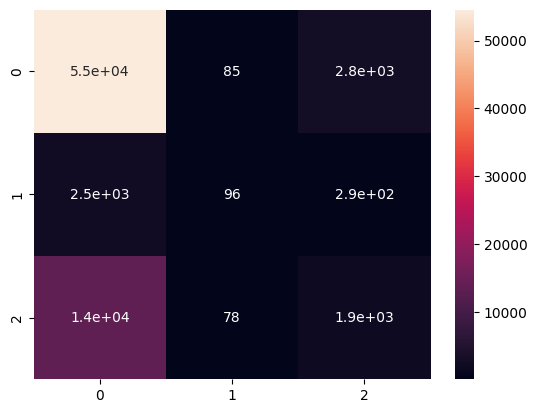

In [ ]:
sns.heatmap(cm,annot=True)

Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['none', 'l2'],
}

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [ ]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,scoring='accuracy', cv=2,n_jobs=-1,verbose=3)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best Cross-Validation Score: 0.7564967671319439


In [ ]:
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nBest Model Performance:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Best Model Performance:
Accuracy: 0.7566909335053514
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     57477
           1       0.44      0.01      0.03      2860
           2       0.46      0.07      0.13     15624

    accuracy                           0.76     75961
   macro avg       0.56      0.36      0.34     75961
weighted avg       0.69      0.76      0.68     75961



# **XGBoost**

XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm. It builds a series of decision trees sequentially, where each new tree corrects errors made by the previous trees. The model combines all these trees to make final predictions.

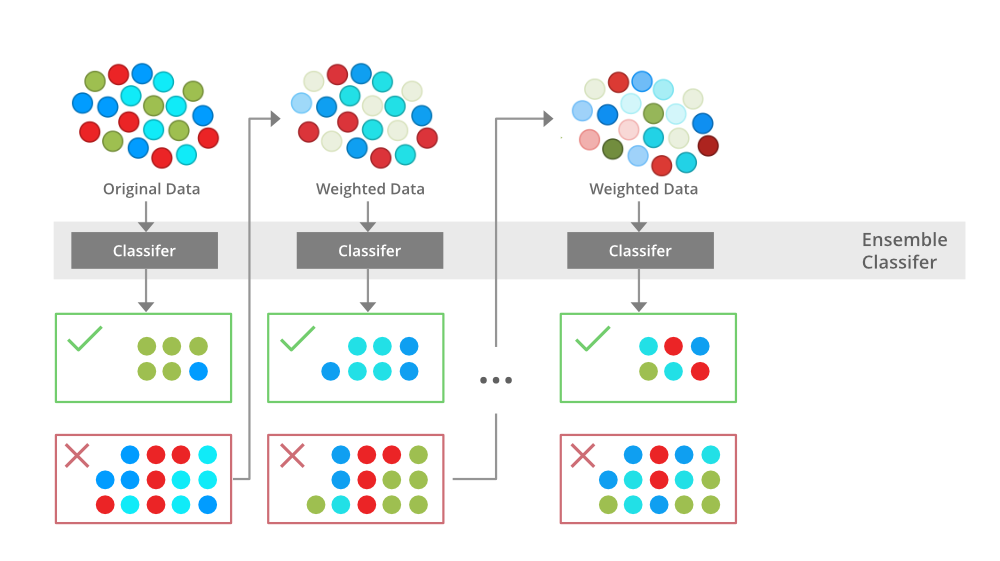

As we saw during the EDA and while fitting Logistic Regression & Random Forest Classifier, there is a class imbalance in our dataset.

In [ ]:
y.value_counts()

,count
Risk_Category,
0,191332
2,52269
1,9602


To deal with thus class imbalance, we'll use an oversampling (increasing the number of instances in the underrepresented class) method called SMOTE.

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to balance imbalanced datasets by creating synthetic samples for the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE()

In [ ]:
# Apply SMOTE to the scaled feature set (X_scaled) and the target variable (y)
# This will create a balanced dataset by oversampling the minority class
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.7,test_size=0.3, random_state=42)

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)

# eval_metric='mlogloss' specifies the evaluation metric to use, in this case, log loss for multi-class classification
# n_estimators=100 sets the number of boosting rounds (trees) to 100

# Train the XGBClassifier on the resampled training data
xgb_clf.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# use the model to make predictions on the resampled test data
y_pred_xgb = xgb_clf.predict(X_test_resampled)

In [ ]:
y_pred_xgb

array([0, 0, 1, ..., 2, 0, 1])

In [ ]:
print(accuracy_score(y_test_resampled, y_pred_xgb))

0.6874372092753152


In [ ]:
print(classification_report(y_test_resampled, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76     57490
           1       0.74      0.71      0.73     57700
           2       0.61      0.51      0.56     57009

    accuracy                           0.69    172199
   macro avg       0.68      0.69      0.68    172199
weighted avg       0.68      0.69      0.68    172199



***Observations:*** You'll notice that the accuracy has dropped slightly but in imbalanced datasets accuracy can often be misleading. Now that we have handled the imbalance, you'll notice that the recall and f1 score of class 1 & 2 has improved significantly.


This is the model we'll use for deployment.

# **Final Model:**

In [ ]:
# Initialize an XGBClassifier instance for the final model
xgb_clf_final = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)

In [ ]:
# Train the final XGBClassifier on the entire resampled dataset
xgb_clf_final.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_clf.predict(X_test_resampled)

In [ ]:
print(accuracy_score(y_test_resampled, y_pred_xgb))

In [ ]:
# Import the joblib library for saving and loading Python objects
import joblib

# Define the file path where the model will be saved
model_path = 'xgb_model.pkl'

# Save the trained XGBClassifier model to the specified file path using joblib
# joblib.dump serializes the model object and writes it to a file
joblib.dump(xgb_clf_final, model_path)

print(f"Model saved to {model_path}")

Model saved to xgb_model.pkl
